# 📘**Business Case: Wine Quality and Prices**

### **1️⃣ Entendimiento del Negocio**

🎯 **Objetivos del Proyecto**

- Construir un modelo predictivo que permita clasificar la calidad del vino al momento del embotellado y, con base en ello, establecer un precio más eficiente desde el inicio.
- Identificar los factores clave que influyen en la calidad y el precio del vino, para optimizar el proceso de producción y orientar decisiones enológicas.
- Mejorar la rentabilidad del negocio, alineando calidad, precio y posicionamiento en el mercado mediante decisiones basadas en datos.

**📌 Situación Actual**

Actualmente, el productor de vino enfrenta dificultades para establecer un precio adecuado para su producto en el momento del embotellado. Luego de años de fermentación, la calidad del vino se evalúa mediante una cata, y con base en esta valoración subjetiva se define su precio en el mercado. Este enfoque tiene riesgos importantes: si el precio es demasiado alto, se pierden consumidores; si es demasiado bajo, se sacrifican márgenes de ganancia.

A pesar de contar con registros físico-químicos detallados del vino, como niveles de alcohol, acidez o azúcares, la empresa no utiliza estos datos para anticipar la calidad del producto ni para guiar el proceso de pricing. Esto genera una dependencia excesiva en evaluaciones humanas, que pueden variar entre catadores y no siempre reflejan el valor real del vino frente al mercado.

La falta de una herramienta analítica limita la capacidad del negocio para tomar decisiones objetivas, consistentes y orientadas a maximizar la rentabilidad. Existe entonces una clara oportunidad de aplicar ciencia de datos para optimizar tanto la predicción de calidad como la definición de precios desde etapas más tempranas del proceso.

La solución propuesta es construir un modelo predictivo capaz de clasificar la calidad del vino al momento del embotellado, utilizando sus propiedades físico-químicas. Esto permitiría fijar precios más precisos, minimizar errores de juicio y mejorar la competitividad del producto en el mercado, logrando un equilibrio entre valor percibido por el cliente y rentabilidad del negocio.

**📊 Objetivos Analíticos del Proyecto**

- Desarrollar un modelo predictivo que clasifique la calidad del vino al embotellado utilizando variables físico-químicas.

- Evaluar el rendimiento del modelo con métricas como precisión, F1-score y validación cruzada para asegurar su efectividad.

- Identificar las variables más influyentes en la calidad del vino, facilitando mejoras en la producción y decisiones de pricing.

#### **📅 Plan de Proyecto – Predicción de Calidad y Precio del Vino**


#### ✅ **1. Recursos Involucrados**

👥 Recursos Humanos

- **Data Scientist:** Encargado del análisis exploratorio de datos (EDA), ingeniería de características, selección de variables relevantes, entrenamiento de modelos de machine learning y evaluación de su desempeño mediante métricas estadísticas.
- **Experto del negocio:** Aporta conocimiento sobre los atributos del vino y validación de interpretaciones.
- **Data Engineer**: Responsable de la limpieza, transformación y estructuración del dataset para asegurar su integridad, consistencia y disponibilidad durante el proceso analítico.
- **Product Owner**: Define los objetivos de negocio y coordina al equipo.
- **Desarrollador**: Si se implementará el modelo en una aplicación o interfaz.

🧪 Recursos Materiales
- **Dataset** con registros físico-químicos y etiquetas de calidad del vino (como el de UCI Wine Quality).
- **Herramientas de análisis y modelado**: Python, Jupyter, Pandas, Scikit-learn, Matplotlib.
- **Computadora con capacidad de procesamiento**
- **Documentación técnica:** notebooks, reportes, visualizaciones.

#### **⚠️ 2. Posibles Riesgos**

| Riesgo                              | Impacto | 
| ----------------------------------- | ------- | 
| Calidad o datos incompletos del dataset | Alta    | 
| Overfitting del modelo              | Media   | 
| Falta de interpretación del modelo  | Alta    | 
| Alineación débil con el negocio     | Alta    | 



#### **⏱️ 3. Hoja de Tiempo (Timeline Estimado - 6 semanas)**


| Semana | Actividad                                            |
| ------ | ---------------------------------------------------- |
| 1      | Recolección y limpieza de datos                      |
| 2      | Análisis exploratorio y visualización                |
| 3      | Selección de variables y feature engineering         |
| 4      | Entrenamiento de modelos base y evaluación inicial   |
| 5      | Ajuste de hiperparámetros y validación cruzada       |
| 6      | Análisis de resultados, conclusiones y entrega final |


### **2️⃣ Entendimiendo de los datos**

- El dataset contiene **1599 registros** y 12 columnas, cada una representando una variable relacionada con las características físico-químicas del vino y su calidad.
- **No hay valores nulos**, ya que todas las columnas tienen exactamente **1599 valores no nulos**.
- La mayoría de las variables son de tipo float64, es decir, numéricas continuas. Solo la variable quality es de tipo entero (int64), lo cual tiene sentido porque representa una calificación discreta del vino.

In [83]:
# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# División de datos
from sklearn.model_selection import train_test_split

# Métricas
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)


# Preprocesamiento resampling
from sklearn.utils import resample



- Cargar el dataset

In [61]:
# Cargar el dataset de calidad del vino tinto
ruta = r"C:/Users/abuen/OneDrive/00 - BUSINNESS INTELLIGENCE/MODULO_2/CURSO/proyecto_final_BI/winequality-red.csv"
df = pd.read_csv(ruta)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- Obtenemos la descripción de los datos

In [62]:
# Descripción de los datos
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Obtenemos la información de los datos


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### **Descripcion el Dataset**

La siguiente tabla desglosa cómo se relaciona cada una de estas variables con el vino y cuál es la correlación que se espera que tengan. (Segun el Business Case)

| Variable                | Descripción                                                                 | Relación esperada |
|-------------------------|------------------------------------------------------------------------------|--------------------|
| fixed acidity           | Acidez no volátil, estable (tartárico, málico)                              | ➕                |
| volatile acidity        | Ácido acético; genera sabor avinagrado si es alto                           | ➖                |
| citric acid             | Conservante natural, aporta frescura y sabor                                 | ➕                |
| residual sugar          | Azúcar restante después de la fermentación                                   | ➖                |
| chlorides               | Sal; en exceso, perjudica el sabor                                           | ➖                |
| free sulfur dioxide     | Conservante que evita oxidación                                              | ❓                |
| total sulfur dioxide    | Suma de todos los SO₂                                                        | ➕                |
| density                 | Relacionada con azúcar y alcohol                                             | ❓                |
| pH                      | Inversamente relacionado con acidez                                          | ❓                |
| sulphates               | Conservante y estabilizador                                                  | ❓                |
| alcohol                 | Nivel alcohólico del vino                                                    | ➕                |


- <u>Valores nulos o faltantes</u>

In [64]:
# Verificar valores nulos por columna
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


- <u>Tipo de datos</u>

In [65]:
print(df.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


- <u>Detección de outliers</u>

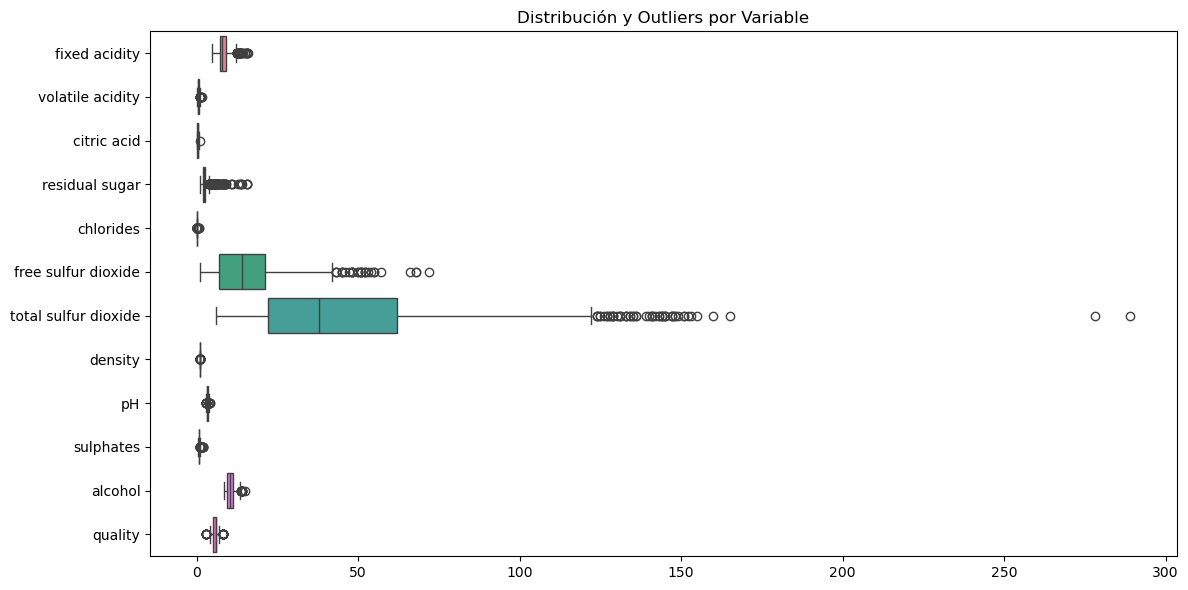

In [66]:
# Detección visual de outliers 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h')
plt.title('Distribución y Outliers por Variable')
plt.tight_layout()
plt.show()

- <u>Distribución de Variables</u>

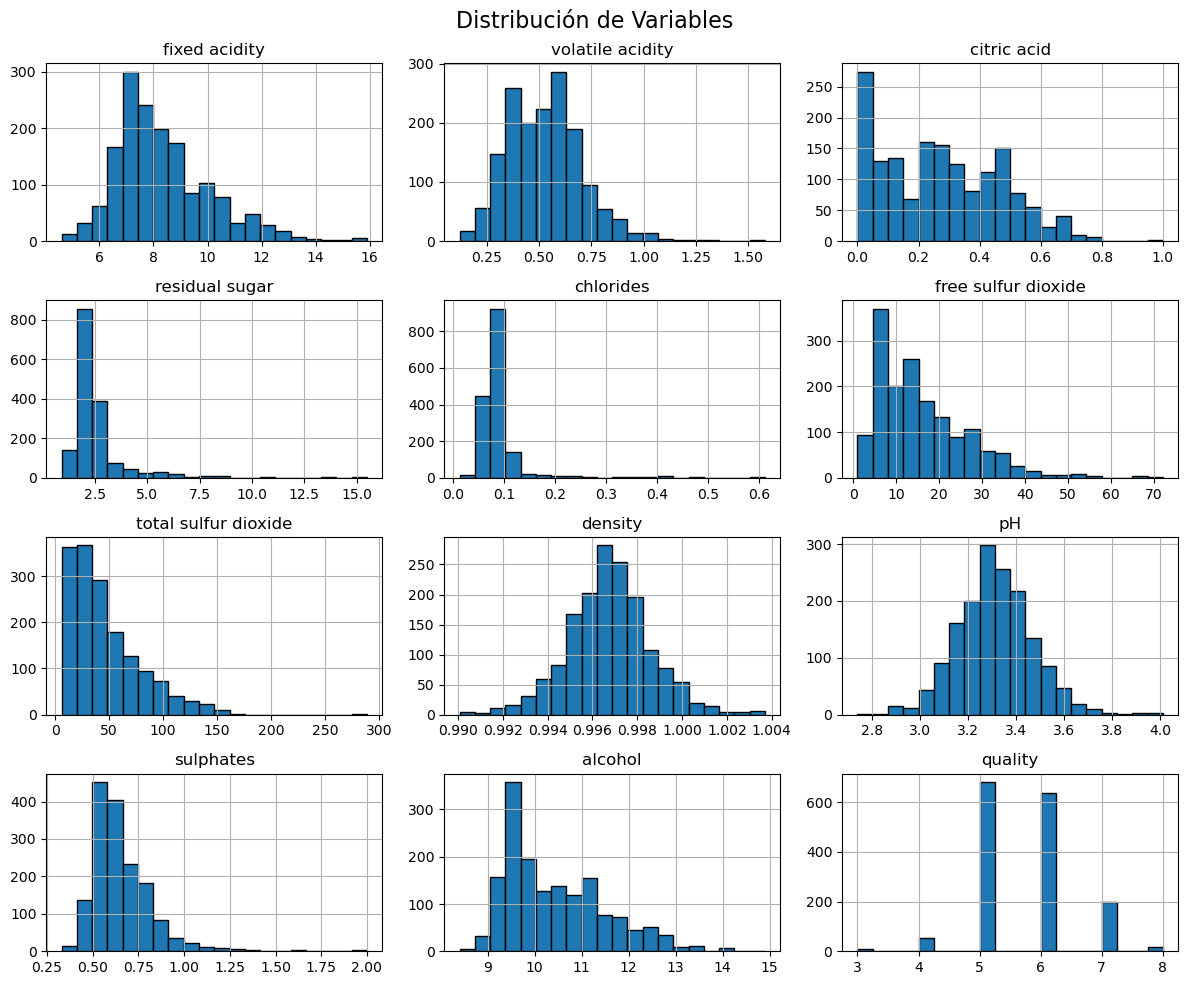

In [67]:
# Histograma de cada variable
df.hist(bins=20, figsize=(12, 10), edgecolor='black')
plt.suptitle('Distribución de Variables', fontsize=16)
plt.tight_layout()
plt.show()


- La mayoría de los vinos tienen una calidad de 5 o 6, mientras que hay muy pocos ejemplos con calidad baja (3–4) o alta (7–8+).
- Esto indica que el modelo de clasificación puede estar sesgado hacia predecir las clases más frecuentes

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


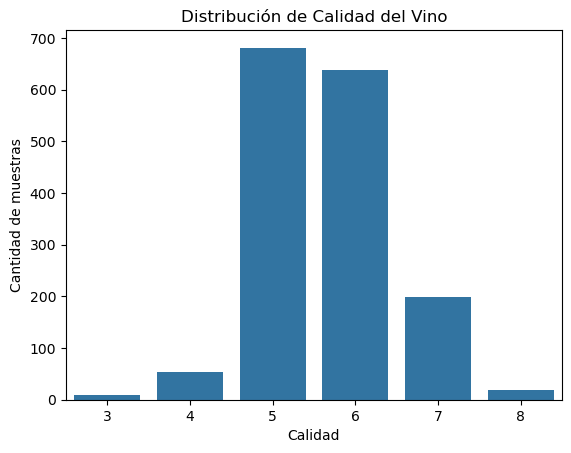

In [68]:
# Conteo de clases
print(df['quality'].value_counts().sort_index())

# Visualización del desbalance
sns.countplot(x='quality', data=df)
plt.title('Distribución de Calidad del Vino')
plt.xlabel('Calidad')
plt.ylabel('Cantidad de muestras')
plt.show()


**Analisis de Correlaciones**

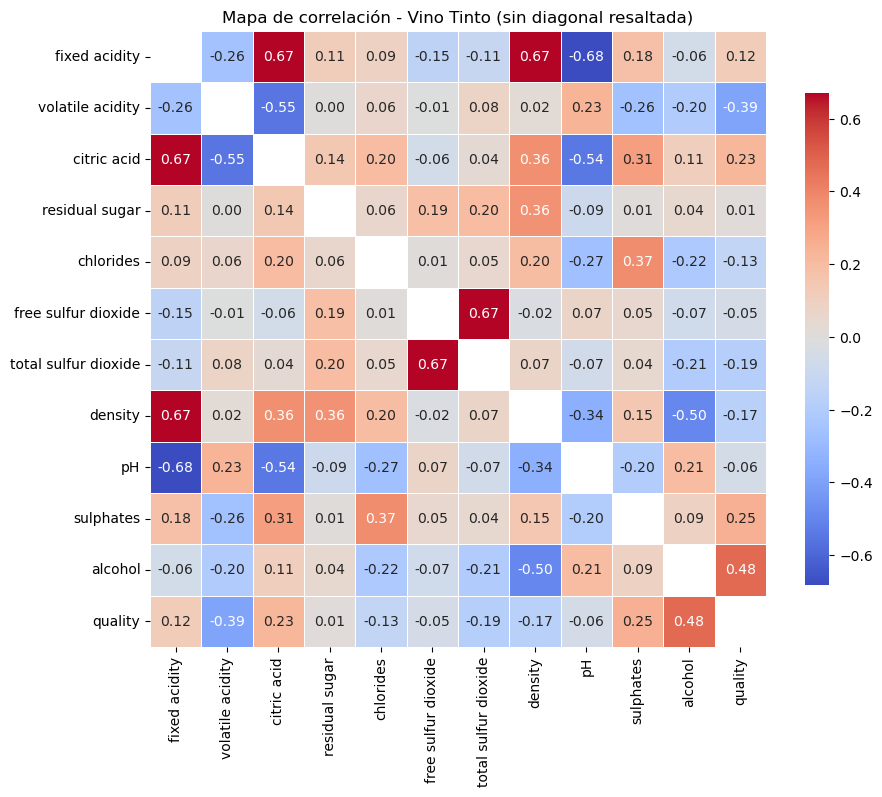

In [69]:
# Calculamos la correlación entre las variables numéricas
correlation_matrix = df.corr(numeric_only=True)

# Reemplace la diagonal con NaN para no mostrar valores de correlación de 1.0
# en el heatmap
np.fill_diagonal(correlation_matrix.values, np.nan)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True,
            linewidths=.5,
            cbar_kws={"shrink": .8},
            mask=correlation_matrix.isnull())  # Opción para ocultar los NaN
plt.title("Mapa de correlación - Vino Tinto (sin diagonal resaltada)")
plt.show()


#### **Calidad de los Datos**

- ✅ No se detectaron valores nulos en ninguna de las variables del dataset original (según revisión con df.isnull().sum()).

- ✅ Todas las variables numéricas están correctamente tipificadas como float64.

- 🔴 Desbalance en la variable `quality` detectado: clases 3 y 8 tienen muy pocos registros.

**📊 Comportamiento General de los Datos**

- La fixed_acidity (acidez fija) y el citric acido (ácido cítrico) tienen una relación positiva, lo cual tiene sentido porque ambos forman parte de los ácidos naturales del vino.
- Tanto la acidez fija como el ácido cítrico están negativamente correlacionados con el pH, porque más acidez significa un pH más bajo.
- En el heatmap de correlación no se observan valores mayores a 0.8 ni menores a -0.8 entre las variables, lo cual indica que no hay problemas de colinealidad fuertes en el dataset. 

    **Calidad vs variables**

- El alcohol está positivamente correlacionado con la calidad, parece que a mayor graduación, mejor valorado es el vino.
- La acidez volátil tiene una relación negativa: si el vino es más agrio o avinagrado, peor lo valoran.
- El ácido cítrico también ayuda, mostrando una correlación positiva, quizás porque aporta frescura o conserva mejor.
- **alcohol, volatile aciditity y sulphates** son variables que tienen correlación con quality, según la matriz de correlación:

    - alcohol correlación positiva moderada (~0.48)
    - volatile acidity correlación negativa (-0.39)
    - sulphates correlación leve positiva (0.25)

### **3️⃣ 🧹 Preparacion de los Datos**
 

Al encontrar que hemos detectado un desbalance en la variable objetivo, decidi aplicar SMOTE para balancear el dataset.

### **4️⃣ 🤖 Modelaje de Datos**

Dado el criterio anterior donde identificamos las relaciones existentes de las varialbe alcoho, volatile acidity y sulphates creamos el modelo de regresion lineal utilizando esas 3 variables. 

🔢 Creación del Modelo de Regresión Lineal

Este modelo tiene como objetivo predecir la calidad del vino como una variable continua, utilizando tres variables independientes: `alcohol`, `volatile acidity` y `sulphates`.


📊 Evaluación del Modelo de Regresión Lineal Multivariada
🔹 Error Cuadrático Medio (MSE):        0.401
🔹 Coeficiente de Determinación (R²):   0.387
🔹 Intercepto del modelo:               2.591

📈 Coeficientes de Regresión:

                  Coefficient
alcohol              0.310766
volatile acidity    -1.158277
sulphates            0.621589


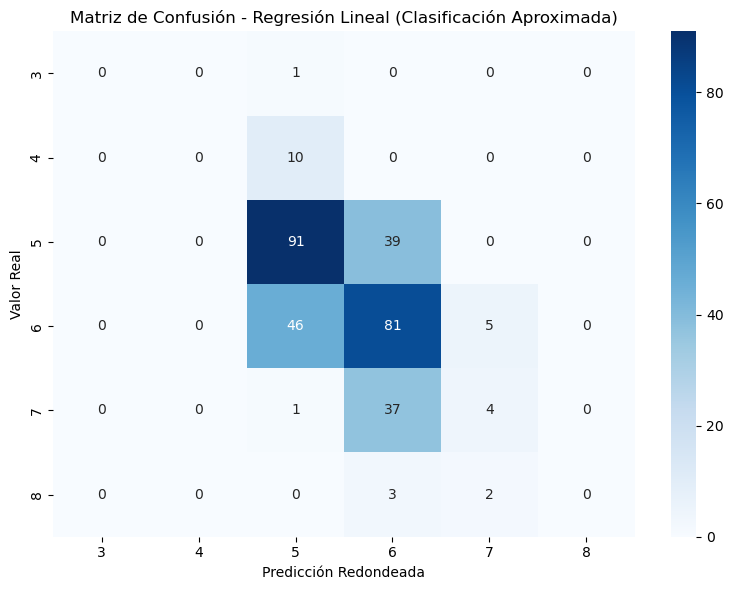

In [89]:
# Creación del Modelo de Regresión Lineal Multivariada
# Selección de variables
X = df[['alcohol', 'volatile acidity', 'sulphates',]]

y = df['quality']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones continuas
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercept = model.intercept_
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

# Mostrar métricas
print("="*60)
print("📊 Evaluación del Modelo de Regresión Lineal Multivariada")
print("="*60)
print(f"🔹 Error Cuadrático Medio (MSE):        {mse:.3f}")
print(f"🔹 Coeficiente de Determinación (R²):   {r2:.3f}")
print(f"🔹 Intercepto del modelo:               {intercept:.3f}")
print("\n📈 Coeficientes de Regresión:\n")
print(coefficients.to_string(index=True))
print("="*60)


# 🔁 Comparación con matriz de confusión
y_pred_rounded = y_pred.round().astype(int)
conf_matrix = confusion_matrix(y_test, y_pred_rounded)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicción Redondeada")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Regresión Lineal (Clasificación Aproximada)")
plt.tight_layout()
plt.show()


In [71]:
# Calcular métricas
ECM = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
intercepto = model.intercept_

# Imprimir resultados
print("="*60)
print("📊 Evaluación del Modelo de Regresión Lineal Multivariada")
print("="*60)
print(f"🔹 Error Cuadrático Medio (ECM):         {ECM:.3f}")
print(f"🔹 Coeficiente de Determinación (R²):    {r2:.3f}")
print(f"🔹 Intersección del modelo (Intercepto): {intercepto:.3f}")
print("\n📈 Coeficientes de Regresión:\n")
print(coefficients.to_string(index=True))
print("="*60)

📊 Evaluación del Modelo de Regresión Lineal Multivariada
🔹 Error Cuadrático Medio (ECM):         0.401
🔹 Coeficiente de Determinación (R²):    0.387
🔹 Intersección del modelo (Intercepto): 2.591

📈 Coeficientes de Regresión:

                  Coefficient
alcohol              0.310766
volatile acidity    -1.158277
sulphates            0.621589


📊 Creación del Modelo de Regresión Logística

Este modelo busca clasificar la calidad del vino como una variable categórica (valores enteros de 3 a 8), utilizando como predictores `alcohol`, `volatile acidity` y `sulphates`. Su objetivo es identificar correctamente la clase a la que pertenece cada muestra.

📊 Evaluación del Modelo de Regresión Logistica
🔹 Precisión del modelo: 0.572

📉 Matriz de Confusión:
[[  0   0   1   1   0   0]
 [  0   0  10   1   0   0]
 [  0   0 102  34   0   0]
 [  0   0  53  73   2   0]
 [  0   0   4  28   8   0]
 [  0   0   0   2   1   0]]


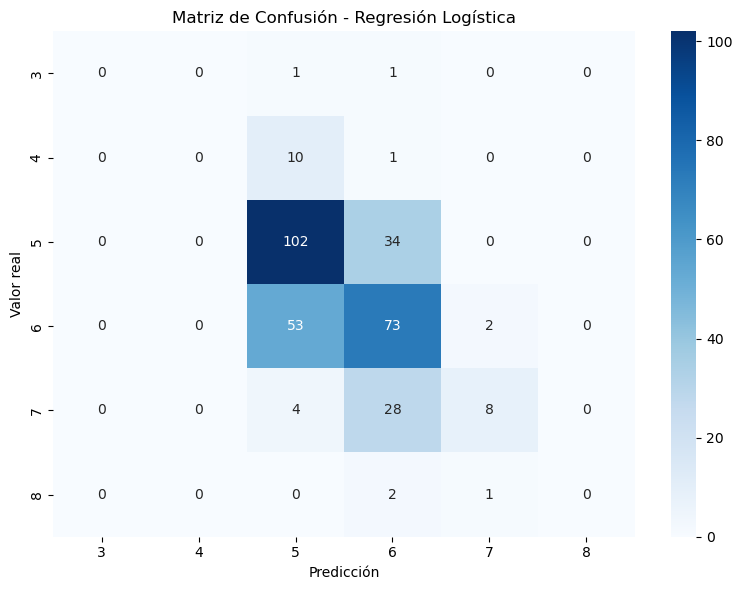


📋 Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.60      0.75      0.67       136
           6       0.53      0.57      0.55       128
           7       0.73      0.20      0.31        40
           8       0.00      0.00      0.00         3

    accuracy                           0.57       320
   macro avg       0.31      0.25      0.25       320
weighted avg       0.56      0.57      0.54       320



In [78]:
# Creacion del Modelo de Regresion Logistica

# Variables predictoras y target original (sin agrupar)
X = df[['alcohol', 'volatile acidity', 'sulphates']]
y = df['quality']  # Sin transformar

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Resultados
print("="*60)
print("📊 Evaluación del Modelo de Regresión Logistica")
print("="*60)
print(f"🔹 Precisión del modelo: {accuracy:.3f}")
print("\n📉 Matriz de Confusión:")
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.tight_layout()
plt.show()

print("\n📋 Informe de Clasificación:")
print(class_report)
print("="*60)


🌲 Creación del Modelo Random Forest

Este modelo de tipo ensamble también clasifica la calidad del vino como variable categórica, aprovechando la capacidad de los árboles para capturar relaciones no lineales y manejar mejor el desbalance de clases sin requerir transformación previa de los datos.

📊 Evaluación del Modelo de Random Forest
🔹 Precisión del modelo Random Forest: 0.650

📉 Matriz de Confusión:
[[  0   0   1   1   0   0]
 [  0   0   7   4   0   0]
 [  0   2 104  27   3   0]
 [  0   0  33  85  10   0]
 [  0   0   2  18  19   1]
 [  0   0   0   2   1   0]]


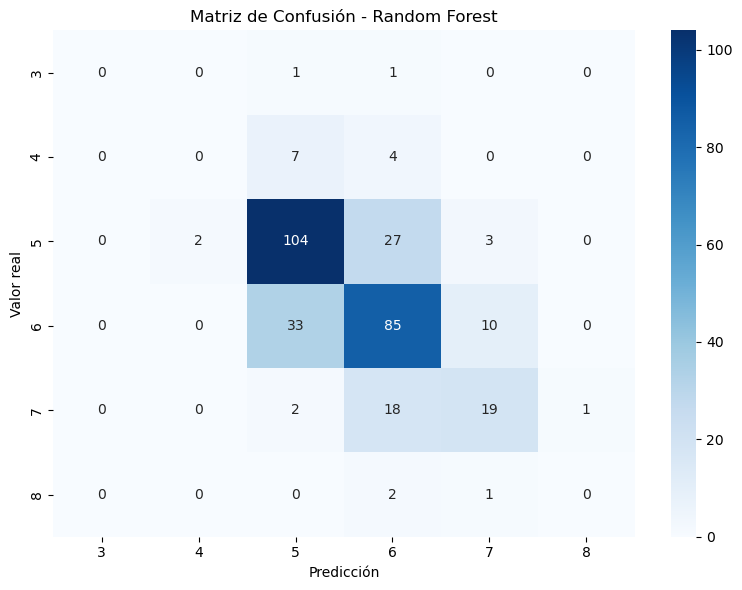


📋 Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.71      0.76      0.73       136
           6       0.62      0.66      0.64       128
           7       0.58      0.47      0.52        40
           8       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.62      0.65      0.63       320



In [80]:
# Creación del modelo de clasificación Random Forest

# Variables predictoras
X = df[['alcohol', 'volatile acidity', 'sulphates']]
y = df['quality']  # SIN agrupar ni balancear

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)

# Resultados
print("="*60)
print("📊 Evaluación del Modelo de Random Forest")
print("="*60)
print(f"🔹 Precisión del modelo Random Forest: {accuracy:.3f}")
print("\n📉 Matriz de Confusión:")
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Random Forest")
plt.tight_layout()
plt.show()

# Informe de clasificación
print("\n📋 Informe de Clasificación:")
print(report)
print("="*60)


- Balanceo de clases mediante resampling

In [ ]:
# Balanceo de clases mediante resampling

# Variables predictoras y target
X = df[['alcohol', 'volatile acidity', 'sulphates']]
y = df['quality']

# Combinar X e y para facilitar el resample
df_full = pd.concat([X, y], axis=1)

# Resample (upsampling)
dfs = []
max_size = df_full['quality'].value_counts().max()

for label in df_full['quality'].unique():
    df_class = df_full[df_full['quality'] == label]
    df_upsampled = resample(df_class, replace=True, n_samples=max_size, random_state=42)
    dfs.append(df_upsampled)

df_balanced = pd.concat(dfs)

# Separar X e y del dataset balanceado
X_bal = df_balanced[['alcohol', 'volatile acidity', 'sulphates']]
y_bal = df_balanced['quality']

# División train/test
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

# ===== Modelo 1: Regresión Lineal =====
lr = LinearRegression()
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test_bal)
mse = mean_squared_error(y_test_bal, y_pred_lr)
r2 = r2_score(y_test_bal, y_pred_lr)

print("="*60)
print("📊 Evaluación del Modelo de Regresión Lineal Multivariada")
print("="*60)
print(f"🔹 Error Cuadrático Medio (ECM):         {mse:.3f}")
print(f"🔹 Coeficiente de Determinación (R²):    {r2:.3f}")
print(f"🔹 Intersección del modelo:              {lr.intercept_:.3f}")
print("\n📈 Coeficientes de Regresión:")
for var, coef in zip(X.columns, lr.coef_):
    print(f"   {var:<20}: {coef:.4f}")
print("="*60)

# ===== Modelo 2: Regresión Logística =====
log_unbal = LogisticRegression(random_state=42, max_iter=1000)
log_unbal.fit(X_train_bal, y_train_bal)
print("\n=== Regresión Logística (balanced data) ===")
print(classification_report(y_test_bal, log_unbal.predict(X_test_bal), zero_division=0))

# ===== Modelo 3: Random Forest =====
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)
print("\n=== Random Forest (balanced data) ===")
print(classification_report(y_test_bal, rf_bal.predict(X_test_bal), zero_division=0))


📊 Evaluación del Modelo de Regresión Lineal Multivariada
🔹 Error Cuadrático Medio (ECM):         1.188
🔹 Coeficiente de Determinación (R²):    0.592
🔹 Intersección del modelo:              -0.695

📈 Coeficientes de Regresión:
   alcohol             : 0.6465
   volatile acidity    : -2.9909
   sulphates           : 1.4757

=== Regresión Logística (balanced data) ===
              precision    recall  f1-score   support

           3       0.53      0.65      0.58       136
           4       0.39      0.21      0.28       136
           5       0.42      0.43      0.43       136
           6       0.31      0.31      0.31       137
           7       0.38      0.45      0.41       137
           8       0.55      0.55      0.55       136

    accuracy                           0.44       818
   macro avg       0.43      0.44      0.43       818
weighted avg       0.43      0.44      0.43       818


=== Random Forest (balanced data) ===
              precision    recall  f1-score   supp

### **5️⃣ 📈 Evaluacion del Trabajo**

**Documentar los resultados** 

Inicialmente se entrenaron modelos de Regresión Lineal, Regresión Logística y Random Forest utilizando los datos sin balancear. Entre estos, el modelo que mostró mejor desempeño general fue la Regresión Lineal, con un Error Cuadrático Medio (ECM) bajo y un R² aceptable, lo que la convierte en una opción sólida para estimar valores continuos como la calidad o el precio del vino.

Posteriormente, al aplicar técnicas de balanceo mediante resampleo (upsampling) para igualar la cantidad de registros por clase, se observó lo siguiente:

- La Regresión Lineal mostró un empeoramiento en su ECM, indicando pérdida de precisión en la predicción continua, posiblemente por el aumento de ruido introducido por el balanceo.

- La Regresión Logística mejoró ligeramente en su capacidad para identificar clases minoritarias, pero su precisión global siguió siendo baja.

- El modelo de Random Forest alcanzó un accuracy de 0.94, con métricas F1 muy altas en todas las clases. Sin embargo, estos resultados deben interpretarse con cautela, ya que podrían indicar sobreajuste (overfitting), dado que el dataset balanceado por resampleo contiene registros replicados, lo cual puede facilitar que el modelo memorice en lugar de generalizar.

En conclusión, el modelo más fiable es la Regresión Lineal sin balancear, mientras que Random Forest requiere validación adicional (por ejemplo, con validación cruzada o SMOTE) para confirmar su capacidad de generalización.

**¿Resultados Satisfactorios?**

En términos generales, los resultados no pueden considerarse completamente satisfactorios. A pesar de que modelos como Random Forest presentaron un alto desempeño luego del balanceo artificial, estos resultados podrían estar inflados debido a overfitting causado por el uso de datos replicados mediante técnicas simples de resampleo.

El principal desafío radica en que el dataset original presenta un alto desbalance entre clases de calidad del vino, lo cual limita la capacidad del modelo para aprender correctamente los patrones de las clases minoritarias (como calidades 3, 4 y 8).

**¿Necesita pruebas adicionales?**

Para lograr predicciones más realistas y generalizables, se recomienda:

- Evaluar otras técnicas de balanceo. 

- Aplicar validación cruzada para evitar depender de una sola división de entrenamiento/prueba.

- Considerar la recolección de más datos de clases poco representadas, lo cual permitiría entrenar modelos más robustos sin forzar un balance artificial.

En resumen, los modelos muestran potencial, pero las condiciones actuales del dataset limitan la confiabilidad de las predicciones, especialmente en tareas de clasificación multiclase.



#### ✅ **Conclusiones para el negocio**

- No podemos confiar en un modelo si los datos están desbalanceados

- Vimos que los modelos fallaban al inicio porque la mayoría de vinos eran de calidad media. Para que las predicciones sean justas, necesitamos que todas las clases estén bien representadas.

- La regresión lineal es una buena aliada para entender tendencias
Aunque no acierta exacto en cada clase, ayuda bastante a estimar cómo se comporta la calidad o el precio según las características del vino.

- Random Forest impresiona, pero hay que mirar más allá del número
Cuando balanceamos con duplicados, los resultados fueron demasiado buenos para ser verdad. Eso nos recuerda que hay que validar bien antes de tomar decisiones con esos modelos.

Si queremos predecir precios con mayor precisión, necesitamos más variedad de datos.

No basta con tener calidad, hace falta más información real sobre tipos de vino y rangos de precio.